## Reading Data and fitting

Our first data set is going to be a classic from nuclear physics, namely all
available data on binding energies. Don't be intimidated if you are not familiar with nuclear physics. It serves simply as an example here of a data set.

We will show some of the
strengths of packages like **Scikit-Learn** in fitting nuclear binding energies to
specific functions using linear regression first. First, however, we need to meet the **Pandas**.

In [10]:
# For showing plots inline
%matplotlib inline

### Meet the Pandas

<!-- dom:FIGURE: [fig/pandas.jpg, width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="fig/pandas.jpg" width=600>

<!-- end figure -->


[Pandas](https://pandas.pydata.org/) is a very useful Python package for reading and organizing data. It is an open source library
providing high-performance, easy-to-use data structures and data
analysis tools for Python. 

**pandas** stands for panel data, a term borrowed from econometrics and is an efficient library for data analysis with an emphasis on tabular data.
**pandas** has two major classes, the **DataFrame** class with two-dimensional data objects and tabular data organized in columns and the class **Series** with a focus on one-dimensional data objects. Both classes allow you to index data easily as we will see in the examples below. 
**pandas** allows you also to perform mathematical operations on the data, spanning from simple reshaping of vectors and matrices to statistical operations. 

The following simple example shows how we can make tables of our data. Here we define a data set which includes names, place of birth and date of birth, and displays the data in an easy to read way.

In [2]:
import pandas as pd
from IPython.display import display
data = {'First Name': ["Frodo", "Bilbo", "Aragorn II", "Samwise"],
        'Last Name': ["Baggins", "Baggins","Elessar","Gamgee"],
        'Place of birth': ["Shire", "Shire", "Eriador", "Shire"],
        'Date of Birth T.A.': [2968, 2890, 2931, 2980]
        }
data_pandas = pd.DataFrame(data)
display(data_pandas)

,First Name,Last Name,Place of birth,Date of Birth T.A.
0,Frodo,Baggins,Shire,2968
1,Bilbo,Baggins,Shire,2890
2,Aragorn II,Elessar,Eriador,2931
3,Samwise,Gamgee,Shire,2980


In the above example we have imported **pandas** with the shorthand **pd**, the latter has become the standard way to import **pandas**. We then make a list of various variables
and reorganize the aboves lists into a **DataFrame** and then print out  a neat table with specific column labels as *Name*, *place of birth* and *date of birth*.
Displaying these results, we see that the indices are given by the default numbers from zero to three.
**pandas** is extremely flexible and we can easily change the above indices by defining a new type of indexing as

In [3]:
data_pandas = pd.DataFrame(data,index=['Frodo','Bilbo','Aragorn','Sam'])
display(data_pandas)

,First Name,Last Name,Place of birth,Date of Birth T.A.
Frodo,Frodo,Baggins,Shire,2968
Bilbo,Bilbo,Baggins,Shire,2890
Aragorn,Aragorn II,Elessar,Eriador,2931
Sam,Samwise,Gamgee,Shire,2980


Thereafter we display the content of the row which begins with the index **Aragorn**

In [4]:
display(data_pandas.loc['Aragorn'])

First Name            Aragorn II
Last Name                Elessar
Place of birth           Eriador
Date of Birth T.A.          2931
Name: Aragorn, dtype: object

We can easily append data to this, for example

In [5]:
new_hobbit = {'First Name': ["Peregrin"],
              'Last Name': ["Took"],
              'Place of birth': ["Shire"],
              'Date of Birth T.A.': [2990]
              }
data_pandas=data_pandas.append(pd.DataFrame(new_hobbit, index=['Pippin']))
display(data_pandas)

,First Name,Last Name,Place of birth,Date of Birth T.A.
Frodo,Frodo,Baggins,Shire,2968
Bilbo,Bilbo,Baggins,Shire,2890
Aragorn,Aragorn II,Elessar,Eriador,2931
Sam,Samwise,Gamgee,Shire,2980
Pippin,Peregrin,Took,Shire,2990


Here are other examples where we use the **DataFrame** functionality to handle arrays, now with more interesting features for us, namely numbers. We set up a matrix 
of dimensionality $10\times 5$ and compute the mean value and standard deviation of each column. Similarly, we can perform mathematial operations like squaring the matrix elements and many other operations.

In [6]:
import numpy as np
import pandas as pd
from IPython.display import display
np.random.seed(100)
# setting up a 10 x 5 matrix
rows = 10
cols = 5
a = np.random.randn(rows,cols)
df = pd.DataFrame(a)
display(df)
print(df.mean())
print(df.std())
display(df**2)

,0,1,2,3,4
0,-1.749765,0.342680,1.153036,-0.252436,0.981321
1,0.514219,0.221180,-1.070043,-0.189496,0.255001
2,-0.458027,0.435163,-0.583595,0.816847,0.672721
3,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
4,1.618982,1.541605,-0.251879,-0.842436,0.184519
5,0.937082,0.731000,1.361556,-0.326238,0.055676
6,0.222400,-1.443217,-0.756352,0.816454,0.750445
7,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
8,-0.544439,-0.668172,0.007315,-0.612939,1.299748
9,-1.733096,-0.983310,0.357508,-1.613579,1.470714


0   -0.175300
1    0.083527
2   -0.044334
3   -0.399836
4    0.331939
dtype: float64
0    1.069584
1    0.965548
2    1.018232
3    0.793167
4    0.918992
dtype: float64


,0,1,2,3,4
0,3.061679,0.117430,1.329492,0.063724,0.962990
1,0.264421,0.048920,1.144993,0.035909,0.065026
2,0.209789,0.189367,0.340583,0.667239,0.452553
3,0.010902,0.282259,1.060349,0.191963,1.250636
4,2.621102,2.376547,0.063443,0.709698,0.034047
5,0.878123,0.534362,1.853835,0.106431,0.003100
6,0.049462,2.082875,0.572069,0.666597,0.563167
7,0.207888,1.415201,2.858185,1.839818,1.518895
8,0.296414,0.446453,0.000054,0.375694,1.689345
9,3.003620,0.966899,0.127812,2.603636,2.162999


Thereafter we can select specific columns only and plot final results

,First,Second,Third,Fourth,Fifth
0,-1.749765,0.342680,1.153036,-0.252436,0.981321
1,0.514219,0.221180,-1.070043,-0.189496,0.255001
2,-0.458027,0.435163,-0.583595,0.816847,0.672721
3,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
4,1.618982,1.541605,-0.251879,-0.842436,0.184519
5,0.937082,0.731000,1.361556,-0.326238,0.055676
6,0.222400,-1.443217,-0.756352,0.816454,0.750445
7,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
8,-0.544439,-0.668172,0.007315,-0.612939,1.299748
9,-1.733096,-0.983310,0.357508,-1.613579,1.470714


0.08352721390288316
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 5 columns):
First     10 non-null float64
Second    10 non-null float64
Third     10 non-null float64
Fourth    10 non-null float64
Fifth     10 non-null float64
dtypes: float64(5)
memory usage: 480.0 bytes
None
           First     Second      Third     Fourth      Fifth
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean   -0.175300   0.083527  -0.044334  -0.399836   0.331939
std     1.069584   0.965548   1.018232   0.793167   0.918992
min    -1.749765  -1.443217  -1.690617  -1.613579  -1.232435
25%    -0.522836  -0.633949  -0.713163  -0.785061   0.087887
50%    -0.280179   0.281930  -0.122282  -0.382187   0.463861
75%     0.441264   0.657041   0.861676  -0.205231   0.923602
max     1.618982   1.541605   1.361556   0.816847   1.470714


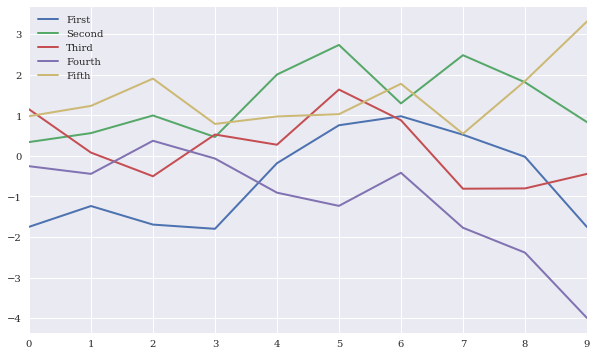

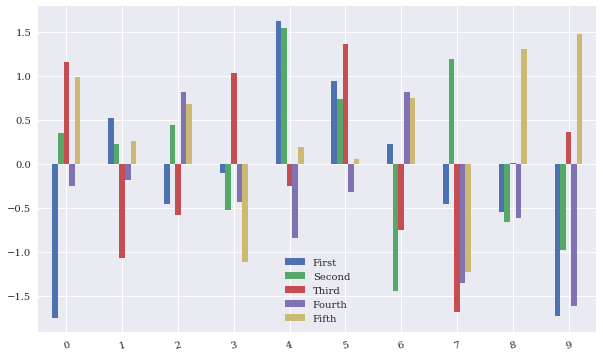

In [12]:
df.columns = ['First', 'Second', 'Third', 'Fourth', 'Fifth']
df.index = np.arange(10)

display(df)
print(df['Second'].mean() )
print(df.info())
print(df.describe())

from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

df.cumsum().plot(lw=2.0, figsize=(10,6));

df.plot.bar(figsize=(10,6), rot=15);

We can produce a $4\times 4$ matrix

In [13]:
b = np.arange(16).reshape((4,4))
print(b)
df1 = pd.DataFrame(b)
print(df1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


and many other operations. 

The **Series** class is another important class included in
**pandas**. You can view it as a specialization of **DataFrame** but where
we have just a single column of data. It shares many of the same features as **DataFrame**. As with **DataFrame**,
most operations are vectorized, achieving thereby a high performance when dealing with computations of arrays, in particular labeled arrays.
As we will see below it leads also to a very concice code close to the mathematical operations we may be interested in.
For multidimensional arrays, we recommend strongly [xarray](http://xarray.pydata.org/en/stable/). **xarray** has much of the same flexibility as **pandas**, but allows for the extension to higher dimensions than two. 

### To our real data: nuclear binding energies. Brief reminder on masses and binding energies

Let us now dive into  nuclear physics and remind ourselves briefly about some basic features about binding
energies.  A basic quantity which can be measured for the ground
states of nuclei is the atomic mass $M(N, Z)$ of the neutral atom with
atomic mass number $A$ and charge $Z$. The number of neutrons is $N$. There are indeed several sophisticated experiments worldwide which allow us to measure this quantity to high precision (parts per million even).

Atomic masses are usually tabulated in terms of the mass excess defined by

$$
\Delta M(N, Z) =  M(N, Z) - uA,
$$

where $u$ is the Atomic Mass Unit

$$
u = M(^{12}\mathrm{C})/12 = 931.4940954(57) \hspace{0.1cm} \mathrm{MeV}/c^2.
$$

The nucleon masses are

$$
m_p =  1.00727646693(9)u,
$$

and

$$
m_n = 939.56536(8)\hspace{0.1cm} \mathrm{MeV}/c^2 = 1.0086649156(6)u.
$$

In the [2016 mass evaluation of by W.J.Huang, G.Audi, M.Wang, F.G.Kondev, S.Naimi and X.Xu](http://nuclearmasses.org/resources_folder/Wang_2017_Chinese_Phys_C_41_030003.pdf)
there are data on masses and decays of 3437 nuclei.

The nuclear binding energy is defined as the energy required to break
up a given nucleus into its constituent parts of $N$ neutrons and $Z$
protons. In terms of the atomic masses $M(N, Z)$ the binding energy is
defined by

$$
BE(N, Z) = ZM_H c^2 + Nm_n c^2 - M(N, Z)c^2 ,
$$

where $M_H$ is the mass of the hydrogen atom and $m_n$ is the mass of the neutron.
In terms of the mass excess the binding energy is given by

$$
BE(N, Z) = Z\Delta_H c^2 + N\Delta_n c^2 -\Delta(N, Z)c^2 ,
$$

where $\Delta_H c^2 = 7.2890$ MeV and $\Delta_n c^2 = 8.0713$ MeV.

A popular and physically intuitive model which can be used to parametrize
the experimental binding energies as function of $A$, is the so-called
**liquid drop model**. The ansatz is based on the following expression

$$
BE(N,Z) = a_1A-a_2A^{2/3}-a_3\frac{Z^2}{A^{1/3}}-a_4\frac{(N-Z)^2}{A},
$$

where $A$ stands for the number of nucleons and the $a_i$s are parameters which are determined by a fit
to the experimental data.

To arrive at the above expression we have assumed that we can make the following assumptions:

 * There is a volume term $a_1A$ proportional to the number of nucleons. When an assembly of nucleons of the same size is packed together into the smallest volume, each interior nucleon has a certain number of other nucleons in contact with it. This contribution is proportional to the volume. Note that the nuclear radius is empirically proportional to $A^{1/3}$.

 * There is a surface energy term $a_2A^{2/3}$. The assumption here is that a nucleon at the surface of a nucleus interacts with fewer other nucleons than one in the interior of the nucleus and hence its binding energy is less. This surface energy term takes that into account and is therefore negative and is proportional to the surface area.

 * There is a Coulomb energy term $a_3\frac{Z^2}{A^{1/3}}$. The electric repulsion between each pair of protons in a nucleus yields less binding.

 * There is an asymmetry term $a_4\frac{(N-Z)^2}{A}$. This term is associated with the Pauli exclusion principle and reflects the fact that the proton-neutron interaction is more attractive on the average than the neutron-neutron and proton-proton interactions.

We could also add a so-called pairing term, which is a correction term that
arises from the tendency of proton pairs and neutron pairs to
occur. An even number of particles is more stable than an odd number.

### Import modules

We import also various modules that we will find useful in order to present various Machine Learning methods. Here we focus mainly on the functionality of **scikit-learn**.

In [14]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

In [15]:
# Nicer plots
import seaborn as sns
sns.set('talk')

### Organizing our data

Let us start with reading and organizing our data.
We start with the compilation of masses and binding energies from 2016.
After having downloaded this file to our own computer, we are now ready to read the file and start structuring our data.


We start with preparing folders for storing our calculations and the data file over masses and binding energies. 

In [16]:
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

Our next step is to read the data on experimental binding energies and
reorganize them as functions of the mass number $A$, the number of
protons $Z$ and neutrons $N$ using **pandas**.  Before we do this it is
always useful (unless you have a binary file or other types of compressed
data) to actually open the file and simply take a look at it!

In [17]:
infile = open(data_path("MassEval2016.dat"),'r')

In [18]:
head = [next(infile) for x in np.arange(42)]
print("".join(head))

1    a0boogfu                                 A T O M I C   M A S S   A D J U S T M E N T
0                                                     DATE  1 Mar 2017 TIME 17:26
0        *********************                               A=   0 TO 295
         * file : mass16.txt *
         *********************

   This is one file out of a series of 3 files published in:
       "The Ame2016 atomic mass evaluation (I)"   by W.J.Huang, G.Audi, M.Wang, F.G.Kondev, S.Naimi and X.Xu
           Chinese Physics C41 030002, March 2017.
       "The Ame2016 atomic mass evaluation (II)"  by M.Wang, G.Audi, F.G.Kondev, W.J.Huang, S.Naimi and X.Xu
           Chinese Physics C41 030003, March 2017.
                       for files : mass16.txt  : atomic masses
                                   rct1-16.txt : react and sep energies,  part 1
                                   rct2-16.txt : react and sep energies,  part 2
   A fourth file  is the "Rounded" version of the atomic mass table (the first file)

In particular, the program that outputs the final nuclear masses is written in Fortran with a specific format. It means that we need to figure out the format and which columns contain the data we are interested in. Pandas comes with a function that reads formatted output. After having admired the file, we are now ready to start massaging it with **pandas**. The file begins with some basic format information.

In [19]:
print("""                                                                                                                         
This is taken from the data file of the mass 2016 evaluation.                                                               
All files are 3436 lines long with 124 character per line.                                                                  
       Headers are 39 lines long.                                                                                           
   col 1     :  Fortran character control: 1 = page feed  0 = line feed                                                     
   format    :  a1,i3,i5,i5,i5,1x,a3,a4,1x,f13.5,f11.5,f11.3,f9.3,1x,a2,f11.3,f9.3,1x,i3,1x,f12.5,f11.5                     
   These formats are reflected in the pandas widths variable below, see the statement                                       
   widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),                                                            
   Pandas has also a variable header, with length 39 in this case.                                                          
""")

                                                                                                                         
This is taken from the data file of the mass 2016 evaluation.                                                               
All files are 3436 lines long with 124 character per line.                                                                  
       Headers are 39 lines long.                                                                                           
   col 1     :  Fortran character control: 1 = page feed  0 = line feed                                                     
   format    :  a1,i3,i5,i5,i5,1x,a3,a4,1x,f13.5,f11.5,f11.3,f9.3,1x,a2,f11.3,f9.3,1x,i3,1x,f12.5,f11.5                     
   These formats are reflected in the pandas widths variable below, see the statement                                       
   widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),                                                            
   

The data we are interested in are in columns 2, 3, 4 and 11, giving us
the number of neutrons, protons, mass numbers and binding energies,
respectively. We add also for the sake of completeness the element name. The data are in fixed-width formatted lines and we will
covert them into the **pandas** DataFrame structure.

In [20]:
# Read the experimental data with Pandas
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the Ebinding column won't be numeric. Coerce to float and drop these entries.
Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
# Convert from keV to MeV.
Masses['Ebinding'] /= 1000

# Group the DataFrame by nucleon number, A.
Masses = Masses.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])

We have now read in the data, grouped them according to the variables we are interested in.
We see how easy it is to reorganize the data using **pandas**. If we
were to do these operations in C/C++ or Fortran, we would have had to
write various functions/subroutines which perform the above
reorganizations for us.  Having reorganized the data, we can now start
to make some simple fits using both the functionalities in **numpy** and
**Scikit-Learn** afterwards.

Now we define five variables which contain
the number of nucleons $A$, the number of protons $Z$ and the number of neutrons $N$, the element name and finally the energies themselves.

In [21]:
A = Masses['A']
Z = Masses['Z']
N = Masses['N']
Element = Masses['Element']
Energies = Masses['Ebinding']
print(Masses)

            N    Z    A Element  Ebinding
A                                        
11  0       4    7   11       N  5.364046
12  4       6    6   12       C  7.680144
13  10      7    6   13       C  7.469849
14  15      8    6   14       C  7.520319
15  22      8    7   15       N  7.699460
...       ...  ...  ...     ...       ...
264 3262  156  108  264      Hs  7.298375
265 3268  157  108  265      Hs  7.296247
266 3275  158  108  266      Hs  7.298273
269 3296  159  110  269      Ds  7.250154
270 3302  160  110  270      Ds  7.253775

[257 rows x 5 columns]


The next step, and we will define this mathematically later, is to set up the so-called **design matrix**. We will throughout call this matrix $\boldsymbol{X}$.
It has dimensionality $p\times n$, where $n$ is the number of data points and $p$ are the so-called predictors. In our case here they are given by the number of polynomials in $A$ (and $N$, $Z$) we wish to include in the fit.

In [51]:
# Now we set up the design matrix X
X = np.zeros((len(A),5))
X[:,0] = np.ones_like(A)
X[:,1] = A
X[:,2] = A**(2.0/3.0)
X[:,3] = Z*(Z-1) * A**(-1.0/3.0)
X[:,4] = (N-Z)**2 * A**(-1.0)

With **scikitlearn** we are now ready to use linear regression and fit our data. Note that we have included an intercept column into our design matrix, which corresponds to a constant predictor term in our model. It is very common to have such a term in a linear regression fit and we include it here although our model actually does not have such a predictor. In fact, the built-in linear regression function that we will use does usually add such an offset automatically and we need to explicitly turn it off using the argument  `fit_intercept=False` since we already have it in our design matrix.

In [52]:
clf = skl.LinearRegression(fit_intercept=False).fit(X, Energies)
fity = clf.predict(X)

Pretty simple!
Now we can print measures of how our fit is doing, the coefficients from the fits and plot the final fit together with our data.

In [53]:
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, fity))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, fity))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, fity))

Mean squared error: 0.02
Variance score: 0.90
Mean absolute error: 0.05


In [54]:
print(clf.coef_)
# Or nicer
print('***')
print('intercept  volume    surface    coulomb     asymmetry')
print("     ".join(["%.3f"%coef for coef in clf.coef_]))

[ 4.72922061 -0.19684447  0.93158472  0.00756687  0.30377802]
***
intercept  volume    surface    coulomb     asymmetry
4.729     -0.197     0.932     0.008     0.304


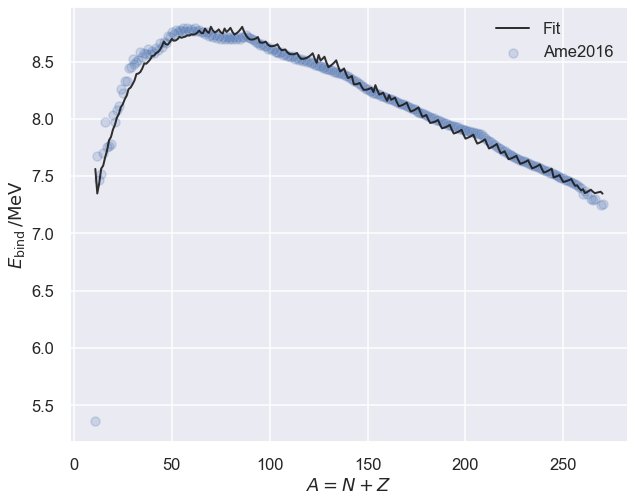

In [55]:
# Generate a plot comparing the experimental with the fitted values values.
Masses['Eapprox']  = fity
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.scatter(Masses['A'], Masses['Ebinding'], alpha=0.2, marker='o',
            label='Ame2016')
ax.plot(Masses['A'], Masses['Eapprox'], alpha=0.9, lw=2, c='k',
            label='Fit')
ax.legend()
save_fig("Masses2016")

## A first summary

The aim behind these introductory words was to present to you various
Python libraries and their functionalities, in particular libraries like
**numpy**, **pandas**, and **matplotlib** and other that make our life much easier
in handling various data sets and visualizing data.

Furthermore, **Scikit-Learn** allows us with few lines of code to implement popular
Machine Learning algorithms for supervised learning.